In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive',force_remount = True)

path = 'drive/My Drive/Colab Notebooks/Social_Network.csv'
df = pd.read_csv(path)


Mounted at /content/drive


In [40]:
data = df
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# Predict
y_pred = classifier.predict(X_test)

# Performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[63  1]
 [ 2 34]]
              precision    recall  f1-score   support

          No       0.97      0.98      0.98        64
         Yes       0.97      0.94      0.96        36

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



In [41]:
le = LabelEncoder()
data['Purchased'] = le.fit_transform(data['Purchased'])

X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Yes/No labels
y_pred = le.inverse_transform(y_pred)
y_test = le.inverse_transform(y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[63  1]
 [ 2 34]]
              precision    recall  f1-score   support

          No       0.97      0.98      0.98        64
         Yes       0.97      0.94      0.96        36

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[63  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.97      0.94      0.96        36

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



In [43]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=0)

print("Training set size: {}".format(len(train_data)))
print("Testing set size: {}".format(len(test_data)))

Training set size: 300
Testing set size: 100


In [44]:
X_train = train_data[['Gender', 'Age', 'EstimatedSalary']]
y_train = train_data['Purchased']
X_test = test_data[['Gender', 'Age', 'EstimatedSalary']]
y_test = test_data['Purchased']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

k = 3
classifier = KNeighborsClassifier(n_neighbors=k)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62  2]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.94      0.92      0.93        36

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



Confusion matrix:
 [[62  2]
 [ 3 33]]
Accuracy: 0.95
Recall: 0.9166666666666666
Precision: 0.9428571428571428
Specificity: 0.96875
F-score: 0.9295774647887323
AUC score: 0.9427083333333333


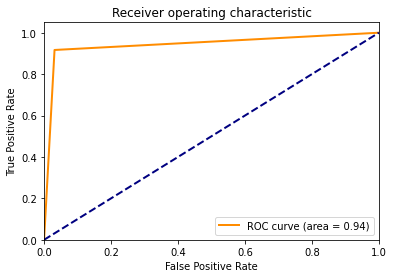

In [45]:
k = 3
classifier = KNeighborsClassifier(n_neighbors=k)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

accuracy = (cm[0][0] + cm[1][1]) / sum(sum(cm))
print("Accuracy:", accuracy)

recall = cm[1][1] / (cm[1][0] + cm[1][1])
print("Recall:", recall)

precision = cm[1][1] / (cm[0][1] + cm[1][1])
print("Precision:", precision)

specificity = cm[0][0] / (cm[0][0] + cm[0][1])
print("Specificity:", specificity)

fscore = 2 * precision * recall / (precision + recall)
print("F-score:", fscore)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print("AUC score:", auc_score)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

k_values = [5, 7, 9, 11]
results = pd.DataFrame(columns=['K value', 'TP', 'TN', 'Accuracy', 'f-score', 'AUC score'])
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    results = results.append({'K value': k, 'TP': tp, 'TN': tn, 'Accuracy': accuracy, 'f-score': f_score, 'AUC score': auc_score}, ignore_index=True)

print(results)

   K value    TP    TN  Accuracy   f-score  AUC score
0      5.0  34.0  63.0      0.97  0.957746   0.964410
1      7.0  35.0  63.0      0.98  0.972222   0.978299
2      9.0  35.0  63.0      0.98  0.972222   0.978299
3     11.0  35.0  63.0      0.98  0.972222   0.978299
